## correlation

In [17]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
means_data=pd.read_csv("mean_data.csv")
means_data.head(20)


,SCHOOL,GRADE_POINTS,Attitude,Availability of learning materials,IN-SERVICE TRAINING,COUNTY
0,Budokomi_Mixed,2.143836,1.687070,1.235119,1.588750,Busia
1,Kaudha_Mixed,2.227907,1.634772,1.727241,1.615507,Siaya
2,Magunga_Mixed,2.804627,2.304378,2.097824,1.891766,Kisumu
3,Malele_Mixed,2.055394,1.813752,1.373762,1.425017,Siaya
4,Nyalunya_Mixed,1.482353,1.000000,1.122335,1.000000,Siaya
5,Ojola_Mixed,1.666667,1.116935,1.369963,1.003307,Siaya
6,Rapogi_Mixed,2.699984,2.397708,2.268121,2.049608,Kisumu
7,Babadogo_Mixed,3.500000,2.946166,2.624836,2.873489,Nairobi
8,Lions_Mixed,5.984323,4.906105,4.938158,5.000000,Kisumu
9,Ndori_Mixed,2.509670,2.021283,1.979024,1.947687,Siaya


### Perform correlations

#### Correlation between Attitude and Performance

In [11]:
corr_Attitude=means_data["GRADE_POINTS"].corr(means_data["Attitude"])
print(corr_Attitude)

0.9777864772130201


#### Correlation between Availability of learning materials and Performance

In [12]:
corr_Materials=means_data["GRADE_POINTS"].corr(means_data["Availability of learning materials"])
print(corr_Materials)

0.9776366234629129


#### Correlation between IN-SERVICE TRAINING and Performance

In [13]:
corr_Inservice=means_data["GRADE_POINTS"].corr(means_data["IN-SERVICE TRAINING"])
print(corr_Inservice)

0.9755974550763188


### PERFORMING CORRELATION MATRIX

<Axes: >

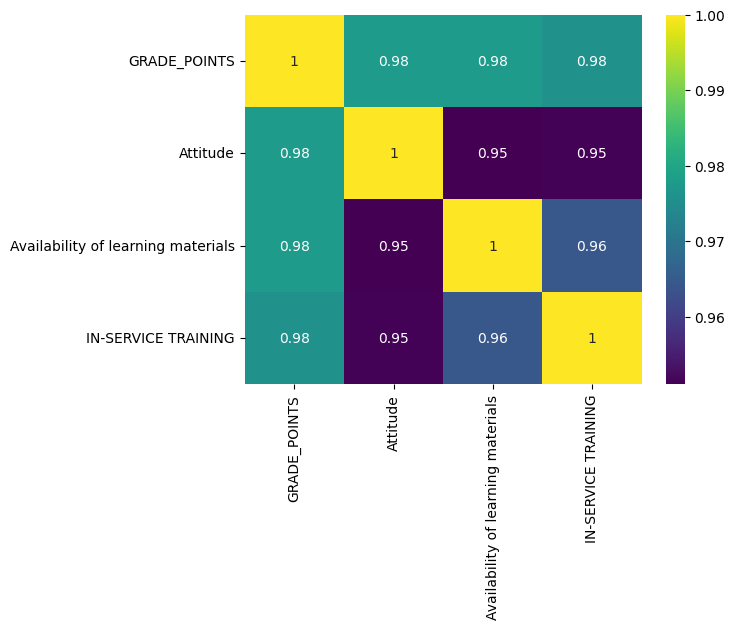

In [14]:
# correlation matrix
numerical_columns=means_data[["GRADE_POINTS","Attitude","Availability of learning materials","IN-SERVICE TRAINING"]]
sns.heatmap(numerical_columns.corr(),annot=True,cmap="viridis")

- From the above results, all the predictors show a strong positive correlation with student performance. This clearly indicates that good performance in mathematics strongly depends on student attitude, availability of learning resources, and teacher qualifications-which  enhance the quality of content delivery.

### REGRESSION

### Hypothesis Testing
- This study sought to test whether student attitude, availability of learning materials, and teacher in-service training significantly influence students’ grade points in mathematics.
#### Hull hypothesis
- H₀₁: Student attitude has no significant effect on mathematics grade points.

- H₀₂: Availability of learning materials has no significant effect on mathematics grade points.

- H₀₃: Teacher in-service training has no significant effect on mathematics grade points.
#### Alternative Hypothesis
- H₁₁: Student attitude significantly affects mathematics grade points.

- H₁₂: Availability of learning materials significantly affects mathematics grade points.

- H₁₃: Teacher in-service training significantly affects mathematics grade points.


### Decision Criteria:

- At a 5% significance level (α = 0.05), the null hypothesis is rejected if the p-value < 0.05.

In [15]:
# define  model variables
X=means_data[["Attitude","Availability of learning materials","IN-SERVICE TRAINING"]]
Y=means_data["GRADE_POINTS"]
# adding y_intercept
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()

RESULT SUMMARY

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           GRADE_POINTS   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     929.6
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           1.78e-40
Time:                        08:28:17   Log-Likelihood:                 33.983
No. Observations:                  49   AIC:                            -59.97
Df Residuals:                      45   BIC:                            -52.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Results

- Attitude (coeff = 0.4627, t = 6.07, p < 0.001) → Reject H₀₁. Attitude has a significant positive effect.

- Availability of learning materials (coeff = 0.3679, t = 4.25, p < 0.001) → Reject H₀₂. Availability - significantly improves performance.

- In-service training (coeff= 0.2999, t = 3.45, p = 0.001) → Reject H₀₃. Training has a significant positive impact.